In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Basic Text Preprocessing
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters, punctuation, numbers
    text = text.lower().strip()  # Convert to lowercase
    return text

# Apply preprocessing
sentiment_data['cleaned_review'] = sentiment_data['review'].apply(preprocess_text)


In [ ]:
import pandas as pd
import re
import nltk
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load the dataset
path = '/content/drive/MyDrive/Deeplearning/SentimentData.csv'
sentiment_data = pd.read_csv(path)


In [ ]:
# Tokenize text
tokenized_reviews = [review.split() for review in sentiment_data['cleaned_review']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)


In [ ]:
# Get average Word2Vec embedding for each review
def get_average_embedding(review):
    words = review.split()
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(100)  # Return a zero vector if no words are in the model

# Apply embeddings
sentiment_data['embedding'] = sentiment_data['cleaned_review'].apply(get_average_embedding)


In [ ]:
# Convert embeddings to a numpy array and labels to numeric
X = np.vstack(sentiment_data['embedding'].values)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(sentiment_data['sentiment'])
y = to_categorical(y)  # Convert to one-hot encoding for binary classification

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Build the Feedforward Neural Network
model = Sequential([
    Dense(128, activation='relu', input_shape=(100,)),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # Output layer with 2 units for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7759 - loss: 0.4613 - val_accuracy: 0.8205 - val_loss: 0.3964
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8354 - loss: 0.3731 - val_accuracy: 0.8497 - val_loss: 0.3477
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8393 - loss: 0.3623 - val_accuracy: 0.8522 - val_loss: 0.3451
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8411 - loss: 0.3595 - val_accuracy: 0.8468 - val_loss: 0.3559
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8454 - loss: 0.3560 - val_accuracy: 0.8487 - val_loss: 0.3466
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8466 - loss: 0.3500 - val_accuracy: 0.8490 - val_loss: 0.3442
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8493 - loss: 0.3468 - val_accuracy: 0.8210 - val_loss: 0.3857
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8480 - loss: 0.3476 - 

In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8412 - loss: 0.3465
Test Accuracy: 84.57%


In [ ]:
# Get predictions for the test data
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded test labels back to single integers


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Accuracy
accuracy = accuracy_score(y_true, y_pred)
# Precision, Recall, F1-Score
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.85
Precision: 0.83
Recall: 0.87
F1 Score: 0.85


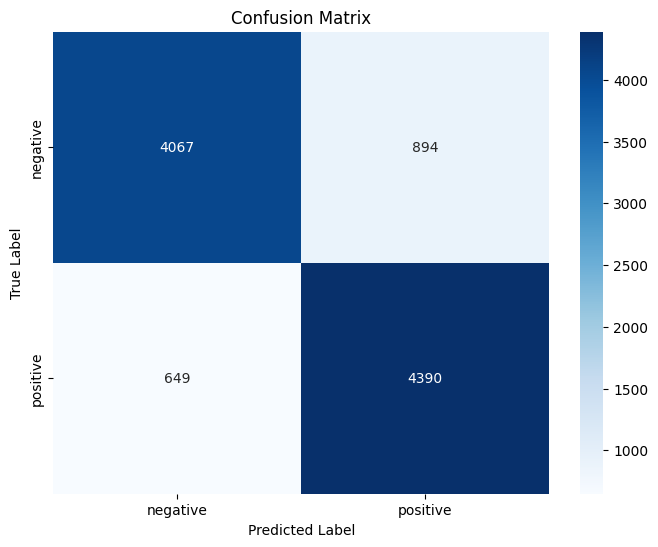

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))


Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.82      0.84      4961
    positive       0.83      0.87      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



y_true: [1 1 0 1 0 1 1 1 0 0]
y_scores: [0.04858575 0.9281371  0.01213935 0.75661826 0.31255004 0.947161
 0.99975216 0.2074375  0.30695966 0.09358267]


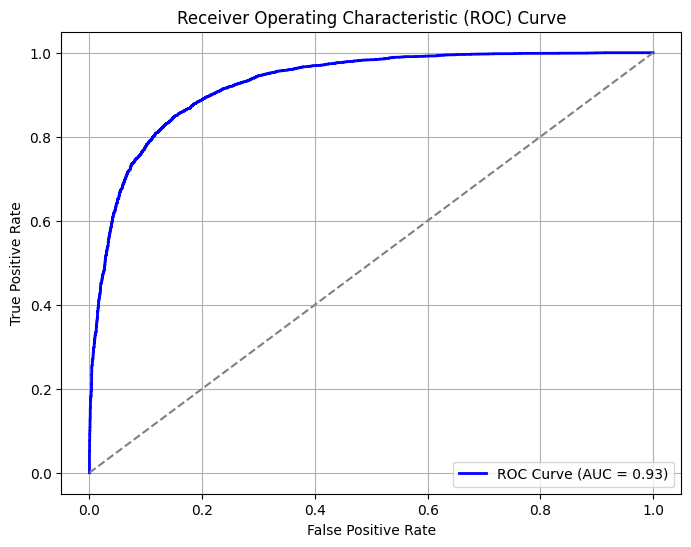

Accuracy: 0.85
Precision: 0.83
Recall: 0.87
F1 Score: 0.85


In [ ]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Convert one-hot encoded labels to binary if necessary
if len(y_true.shape) > 1 and y_true.shape[1] > 1:
    y_true = y_true.argmax(axis=1)

# Ensure y_scores contains probabilities for the positive class
if y_scores.ndim > 1 and y_scores.shape[1] > 1:
    y_scores = y_scores[:, 1]

# Verify data
print("y_true:", y_true[:10])  # Ensure binary values
print("y_scores:", y_scores[:10])  # Ensure probabilities

# Generate ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Calculate and print other metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


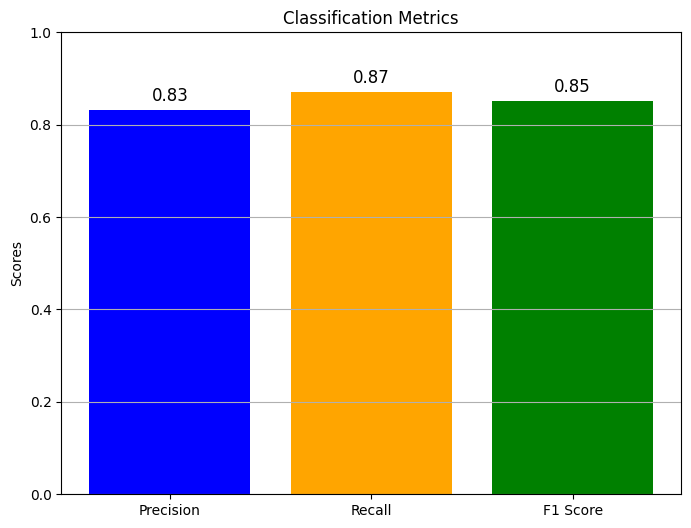

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Replace y_true and y_pred with your actual true labels and predictions
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

metrics = ['Precision', 'Recall', 'F1 Score']
values = [precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'orange', 'green'])
plt.ylim(0, 1)
plt.ylabel('Scores')
plt.title('Classification Metrics')
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontsize=12)
plt.grid(axis='y')
plt.show()


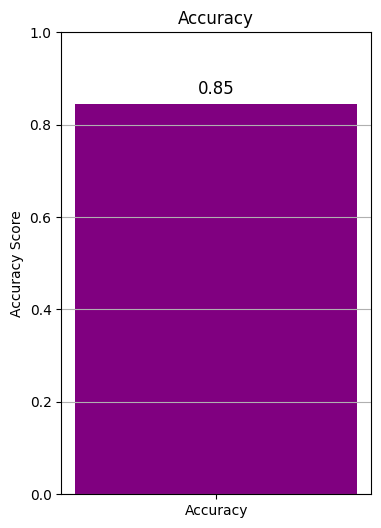

In [ ]:
from sklearn.metrics import accuracy_score

# Replace y_true and y_pred with your actual true labels and predictions
accuracy = accuracy_score(y_true, y_pred)

plt.figure(figsize=(4, 6))
plt.bar(['Accuracy'], [accuracy], color=['purple'])
plt.ylim(0, 1)
plt.ylabel('Accuracy Score')
plt.title('Accuracy')
plt.text(0, accuracy + 0.02, f'{accuracy:.2f}', ha='center', fontsize=12)
plt.grid(axis='y')
plt.show()
